# 2022 Final Exam 

Course: AP3021

### 1. The given data is the temperature profile of the radiosonde.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# read the data

with open(r"./obs_2021-03-18_12_00_00.SOUND") as input_file:

    # pass the first and second line.
    for i in range(2):
        head = input_file.readline()
        # print(head)
    
    # read the other data we need.
    data = input_file.readlines()
    data_size = len(data)
    print(data_size)

    # Create the temperature and pressure to the array.
    temperature_arr = np.zeros(data_size)
    pressure_arr = np.zeros(data_size)


    # Save the temperature and pressure from the data to the array.
    for i in range(0, data_size):

        temperature = data[i].split()[3]
        pressure = data[i].split()[0]

        temperature_arr[i] = temperature
        pressure_arr[i] = pressure


# Show the array to check
# print('Temperature array:', temperature_arr)
print('Pressure array:', pressure_arr)

371
Pressure array: [1009.9839 1008.8101 1008.2232 1007.0579 1006.476  1005.894  1005.3077
 1004.1254 1003.5343 1002.9434 1002.3524 1001.7685 1000.6122 1000.0319
  998.8713  998.291   997.711   997.1311  996.5512  995.3936  994.8185
  994.2434  992.5253  991.9564  990.8186  990.2497  989.6808  988.543
  987.9741  987.4052  986.2715  985.1433  984.5792  984.0151  983.451
  981.1947  980.6306  979.5024  978.9383  978.3742  977.2461  976.6839
  976.1262  975.5685  975.0108  973.8953  973.3376  971.1068  970.5491
  969.9914  969.4336  968.8759  968.3182  967.7605  967.2028  966.0954
  965.5427  964.4375  963.3322  962.7796  962.2269  961.6743  960.569
  960.0164  959.4638  958.3585  957.8059  957.2533  956.7043  954.5158
  953.9686  953.4215  952.8744  951.7801  951.233   950.6858  949.5915
  948.4973  947.9501  947.403   946.3202  945.7802  944.7002  944.1602
  943.6202  943.0801  942.5401  942.0001  940.9201  940.3801  939.8401
  938.22    937.14    936.06    935.52    934.98    934.4399

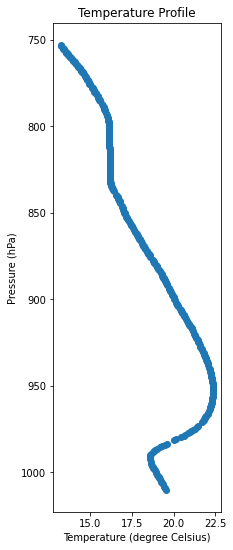

In [3]:
plt.figure(figsize=(3,9))      
plt.scatter(temperature_arr, pressure_arr)
plt.gca().invert_yaxis()

plt.title("Temperature Profile")
plt.ylabel("Pressure (hPa)")
plt.xlabel("Temperature (degree Celsius)")

plt.show()

1. Determine the vertical temperature gradient with the central difference method (10%) 

In [4]:
def central_diff(pressure_arr, temperature_arr, data_size):

    # The first and the last need to be special progress.

    temp_grad_arr = []


    for i in range(0, data_size):

        if i == 0:
            pressure_div = float(pressure_arr[i + 1] - pressure_arr[i])
            temp_div = float(temperature_arr[i + 1] - temperature_arr[i])
            temp_grad =  temp_div / pressure_div
        elif i == data_size - 1:
            pressure_div = float(pressure_arr[i] - pressure_arr[i - 1])
            temp_div = float(temperature_arr[i] - temperature_arr[i - 1])
            temp_grad =  temp_div / pressure_div
        else:
            pressure_div = float(pressure_arr[i + 1] - pressure_arr[i - 1])
            temp_div = float(temperature_arr[i + 1] - temperature_arr[i - 1])
            temp_grad =  temp_div / pressure_div

        temp_grad_arr.append(temp_grad)

    return temp_grad_arr

In [5]:
temp_grad_arr = central_diff(pressure_arr, temperature_arr, data_size)

for i in range(0, len(temp_grad_arr)):
    print(f"The pressure: {pressure_arr[i]} (hPa).;\t The temperature gradient: {temp_grad_arr[i]}.")

The pressure: 1009.9839 (hPa).;	 The temperature gradient: 0.07667405009371818.
The pressure: 1008.8101 (hPa).;	 The temperature gradient: 0.06815471119441262.
The pressure: 1008.2232 (hPa).;	 The temperature gradient: 0.0741924437849548.
The pressure: 1007.0579 (hPa).;	 The temperature gradient: 0.0801282051282045.
The pressure: 1006.476 (hPa).;	 The temperature gradient: 0.06014262393676393.
The pressure: 1005.894 (hPa).;	 The temperature gradient: 0.0513566720876487.
The pressure: 1005.3077 (hPa).;	 The temperature gradient: 0.05654189754608069.
The pressure: 1004.1254 (hPa).;	 The temperature gradient: 0.06202774331792271.
The pressure: 1003.5343 (hPa).;	 The temperature gradient: 0.059221658206429204.
The pressure: 1002.9434 (hPa).;	 The temperature gradient: 0.05922666892291888.
The pressure: 1002.3524 (hPa).;	 The temperature gradient: 0.0595795386841446.
The pressure: 1001.7685 (hPa).;	 The temperature gradient: 0.05746465923457087.
The pressure: 1000.6122 (hPa).;	 The temperat

2. Determine the temperature at the level of 975hPa with the Newton finite difference methods. (10%)

In [6]:
def newt_fin_diff(x, y, n, x_miss):

    fdd = np.zeros((n, n))
    fdd[0: n, 0] = y[0: n]
    
    for j in range(1, n, 1):
        for i in range(0, n-j, 1):
            fdd[i, j] = (fdd[i + 1, j - 1] - fdd[i, j - 1]) / (x[i + j] - x[i])

    y_interp = y[0]
    xterm = 1.0

    for order in range(1, n):
        xterm = xterm * (x_miss - x[order - 1])
        y_interp = y_interp + fdd[0, order] * xterm
        
    return y_interp

In [7]:
def Newt(x, y, n, x_miss):
    fdd = np.zeros((n, n))
    fdd[0:n, 0] = y[0:n]
    for j in range(1, n, 1):
        for i in range(0, n-j, 1):
            fdd[i, j] = (fdd[i+1, j-1] - fdd[i, j-1]) / (x[i+j] - x[i])
    y_interp = y[0]
    xterm = 1.0
    for order in range(1, n):
        xterm = xterm * (x_miss - x[order - 1])
        y_interp = y_interp + fdd[0, order] * xterm
    return y_interp

T_975 = Newt(pressure_arr, temperature_arr, 1, 975.0)
print('At the level of 975hpa, the temperature =', T_975, '(Newton)')
print('------------------------------------------')

At the level of 975hpa, the temperature = 19.56 (Newton)
------------------------------------------


3. Determine the determine the temperature at the level of 975hPa with the cubic spline method (10%)

In [8]:
#18.28 (c)
import numpy as np
import matplotlib.pyplot as plt

T = [0,8,16,24,32,40]
o = [14.621,11.843,9.870,8.418,7.305,6.413]
true_value = 7.986

def cubic_inter(x0, x, y):

    x = np.array(x)
    y = np.array(y)
    # remove non finite values
    # indexes = np.isfinite(x)
    # check if sorted
    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]

    size = len(x)
    xdiff = np.diff(x)
    ydiff = np.diff(y)

    # allocate buffer matrices
    Li = np.zeros(size)
    Li_1 = np.zeros(size-1)
    z = np.zeros(size)

    # fill diagonals Li and Li-1 and solve [L][y] = [B]
    Li[0] = np.sqrt(2*xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 # natural boundary
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = np.sqrt(2*(xdiff[i-1]+xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6*(ydiff[i]/xdiff[i] - ydiff[i-1]/xdiff[i-1])
        z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = np.sqrt(2*xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 # natural boundary
    z[i] = (Bi - Li_1[i-1]*z[i-1])/Li[i]

    # solve [L.T][x] = [y]
    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1]*z[i+1])/Li[i]

    # find index
    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + zi1/(6*hi1)*(x0-xi0)**3 + (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

# if __name__ == '__main__':
#     x_new = np.linspace(0, 40, 40)
#     plt.scatter(T,o,s=15)
#     plt.scatter(27,cubic_inter(x_new,T,o)[26],s=15)
#     plt.title('Cubic spline')
#     plt.plot(x_new, cubic_inter(x_new,T,o))
#     plt.legend(['Cubic spline','Data point','Cubic spline value'])
#     plt.grid()
#     plt.show()
print('Cubic spline =',cubic_inter([975],pressure_arr,temperature_arr)[0])
# print('exact_result=',7.986)
# ea = abs((true_value - cubic_inter(x_new,T,o)[26])/true_value)
# print('relative error=',ea)

Cubic spline = 21.26154322713325


4. Determine the depth of inversion with the Lagrange method (10%) 

In [9]:
def Lagrage(x, y, f, n, x_miss):
  sum = 0.0

  for i in range(f, n):
    product = 1
    for j in range(f, n):
      if i != j:
        product = product * (x_miss - x[j]) / (x[i] - x[j])
    sum  = sum + product * y[i]
  return sum

for cou in range(11, len(pressure_arr)-10):
    forw = Lagrage(
      pressure_arr, 
      temperature_arr, 
      cou-2, 
      cou+9, 
      (float(pressure_arr[cou-2])+float(pressure_arr[cou+10]))/2
    )
    midd = Lagrage(
      pressure_arr, 
      temperature_arr, 
      cou-5, 
      cou+6, 
      (float(pressure_arr[cou-5])+float(pressure_arr[cou+5]))/2
    )
    back = Lagrage(
      pressure_arr, 
      temperature_arr, 
      cou-8, 
      cou+3, 
      (float(pressure_arr[cou-8])+float(pressure_arr[cou+2]))/2
    )
    if max(forw, midd, back) == midd or min(forw, midd, back) == midd:
        print('The depth of inverse:', (float(pressure_arr[cou-5])+float(pressure_arr[cou+5]))/2)

The depth of inverse: 993.6958999999999
The depth of inverse: 992.83705
The depth of inverse: 992.26265
The depth of inverse: 991.3994
The depth of inverse: 954.52215
The depth of inverse: 953.6986999999999
The depth of inverse: 952.8752999999999
The depth of inverse: 952.3272
The depth of inverse: 950.9594
The depth of inverse: 828.996
The depth of inverse: 828.0172500000001
The depth of inverse: 824.11275
The depth of inverse: 822.89855
The depth of inverse: 822.17005
The depth of inverse: 821.6844000000001
The depth of inverse: 820.4702
The depth of inverse: 819.01315
The depth of inverse: 815.6134500000001
The depth of inverse: 813.18505
The depth of inverse: 811.97215
The depth of inverse: 810.77215
The depth of inverse: 809.08655
The depth of inverse: 808.1247
The depth of inverse: 807.64375
The depth of inverse: 807.1628000000001
The depth of inverse: 806.43905
The depth of inverse: 805.24505
The depth of inverse: 803.34035
The depth of inverse: 802.14985


### 2. Please evaluate the total precipitable water (TPW) with the following formula. TPW= !"!#∫ 𝑞(𝑧)𝑑𝑧$"% , where 𝑞(𝑧) is the water vapor mixing ratio, 𝜌& is the water density (1000 [kg/m3]), g is the gravitational constant (9.8 [m/s2]) and 𝑍' is the top of atmosphere. The vertical distribution of water vapor mixing ratio (g/Kg) can be described as function of height (km) (Eq. (1)). 


𝑞(𝑧) = −6.01𝑧(+ 4.92𝑧)− 0.024𝑧*+ 0.13𝑧+− 0.37𝑧,− 1.88𝑧 + 20.00   (1) 

1. Calculate TPW with the trapezoid, Simpson 1/3 and Romberg methods. (24%) Please use the data points from 0 to 10km with an interval of 1km. 

In [10]:
from scipy import integrate
from scipy.special import erf
import numpy as np


# Define the water vapor mixing ratio
def q(z):

    qz = -6.01 * (z**8) \
        + 4.92 * (z**7) \
        - 0.024 * (z**4) \
        + 0.13 * (z**3) \
        - 0.37 * (z**2) \
        - 1.88 * z \
        + 20.00

    return qz

In [11]:
# The variable in the question
water_density = 1000 * 1000 * 1000 * 1000
gravity = 9.8 * 0.001
para = 1 / (water_density * gravity)

x = np.array([0.,1.,2.,3., 4., 5., 6., 7., 8., 9., 10.])
# x = np.array([0.,1000.,2000.,3000., 4000., 5000., 6000., 7000., 8000., 9000., 10000.])
qx = q(x)

for i in range(0, 11):

    print(i, qx[i])

0 20.0
1 16.766
2 -893.384
3 -28658.974000000002
4 -313253.3439999999
5 -1963278.65
6 -8717214.664
7 -30594646.774
8 -90513130.78400001
9 -235178675.31399995
10 -551800145.8


### Trapezoid Method

In [12]:
def trapezoid_method(n, fx):

    h = (10 - 0) / n
    sum = 0
    sum += fx[0]

    for i in range(1, n):
        sum += 2 * fx[i]
    
    sum += fx[n]
    ans = h * sum / 2

    return ans


trapezoid_method_result = para * trapezoid_method(10, qx)
print("Trapezoid:", trapezoid_method_result)

Trapezoid: -0.06563365285938774


### Simpson 1/3 Method

In [13]:
def simpson_13_method(n, fx):

    h = (10 - 0) / n
    sum = 0
    sum += fx[0]

    for i in range(1, n, 2):
        print(i)
        sum += 4 * fx[i]
    
    for i in range(2, n, 2):
        print(i)
        sum += 2 * fx[i]
    
    sum += fx[n]

    ans = h * sum / 3

    return ans

simpson_13_method_result = para * simpson_13_method(10, qx)
print("Simpson 1/3:", simpson_13_method_result)

1
3
5
7
9
2
4
6
8
Simpson 1/3: -0.06197109122231291


### Romberg Method

In [14]:
def TrapEq(a, b, n):
    h = (b - a) / n
    x = a
    sum_tra = q(x)
    for i in range(1, n):
        x = x + h
        sum_tra = sum_tra + 2 * q(x)

    sum_tra = sum_tra + q(b)
    Trap = (b - a) * sum_tra / (2 * n)
    return Trap

def I(j, k, a, b):
    if k == 1:
        n = 2 ** (j - 1)
        return TrapEq(a, b, n)
    else:
        i_jk = ((4 ** (k-1)) * I(j + 1, k - 1, a, b) \
            - I(j, k - 1, a, b)) / ((4 ** (k - 1)) - 1)
        return i_jk

def Romberg(a, b, es):
    i_ter = 0
    while True:
        i_ter = i_ter + 1

        for k in range(2, i_ter + 2):
            j = 2 + i_ter - k
            # print(I(j, k, a, b))

        ea = abs((I(1, i_ter + 1, a, b) - I(2, i_ter, a, b)) / I(1, i_ter + 1, a, b)) * 100
        #print('ea = ', ea)
        if ea < es:
            #print('iter = ', i_ter)
            break

    return I(1, i_ter + 1, a, b)

print("Romberg:", para * Romberg(0, 10, 0.05))

Romberg: -0.061870087715950935


2. Calculate TPW with the Gauss-quadrature method (16%) 

### 3. Given pairs of temperature (°C) and saturation vapor pressure data (Pa), Please derive the Clausius–Clapeyron (C-C) equation. 

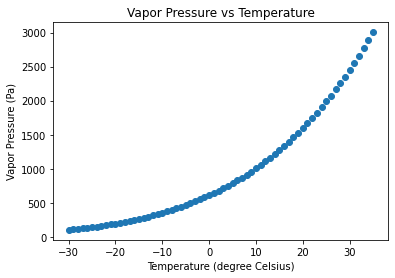

In [15]:
from os.path import dirname, join as pjoin
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

#讀資料
mat_contents = sio.loadmat(r"cceqs.mat")
sorted(mat_contents.keys())
# print(mat_contents)
Tc = mat_contents['Tc'][0]
e = mat_contents['e'][0]


#確認資料
#plt.plot(Tc,e)
plt.scatter(Tc,e)
plt.title("Vapor Pressure vs Temperature")
plt.ylabel("Vapor Pressure (Pa)")
plt.xlabel("Temperature (degree Celsius)")
plt.show()

1. Please construct the C-C equation using the LINEAR regression (25%) 

879.9865701296675 41.10433052361058 2160.6155885448184 0.8965758428578144 0.9468768889659386


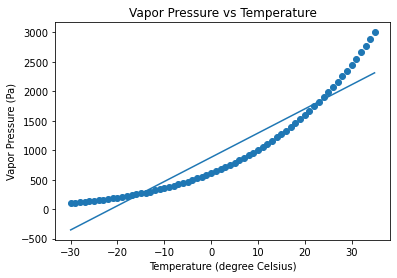

In [16]:
def regression(x, y, n):
    sum_x = 0
    sum_y = 0

    sum_xy = 0
    sum_x2 = 0

    st = 0
    sr = 0

    for i in range(0, n):
        sum_x += x[i]
        sum_y += y[i]

        sum_xy += x[i] * y[i]
        sum_x2 += x[i] * x[i]

    x_mean = sum_x / n
    y_mean = sum_y / n

    a1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x * sum_x)
    a0 = y_mean - a1 * x_mean

    for i in range(0, n):
        st += (y[i] - y_mean) ** 2
        sr += (y[i] - a0 - a1 * x[i]) ** 2

    syx = (sr - (n - 2)) ** 0.5
    r2 = (st - sr) / st
    r = ((st - sr) / st) ** 0.5

    return a0, a1, syx, r2, r

a0, a1, syx, r2, r = regression(Tc,e,66)
print(a0, a1, syx, r2, r)

xs = np.arange(-30, 35, 0.1)
ys = a1 * xs + a0
plt.plot(xs, ys)
plt.scatter(Tc,e)
plt.title("Vapor Pressure vs Temperature")
plt.ylabel("Vapor Pressure (Pa)")
plt.xlabel("Temperature (degree Celsius)")


plt.show()

2. Please determine the goodness of fitting (5%). 


NameError: name 'a_0' is not defined

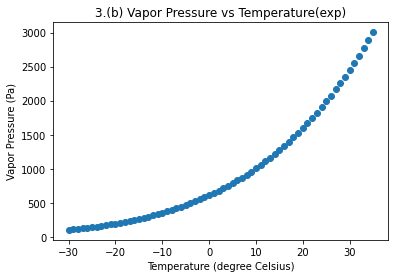

In [17]:
e_ln = np.log(e)    #轉為ln

def expolin(x):
    a0_3 = a_0(Tc, e_ln, len(Tc))
    a1_3 = a_1(Tc, e_ln, len(Tc))
    return np.exp(a0_3 + a1_3 * x)  #轉回e

plt.title('3.(b) Vapor Pressure vs Temperature(exp)')
plt.xlabel('Temperature (degree Celsius)')
plt.ylabel('Vapor Pressure (Pa)')
plt.plot(Tc, e, 'o', label = 'data')
plt.plot(xs, expolin(xs), label = "Regression Line\n(y=e**(" + str(a_0(Tc, e_ln, len(Tc))) + "+" + str(a_1(Tc, e_ln, len(Tc))) + "*x))")
plt.grid(True)
plt.legend()
plt.show()

### 4. The given data is the ground-based Global Navigation Satellite System (GNSS) zenith total delay on 19 July 2019 with an interval of 30 min (at 15 and 45 minutes). Please apply FFT and find the diurnal component of this data set. 

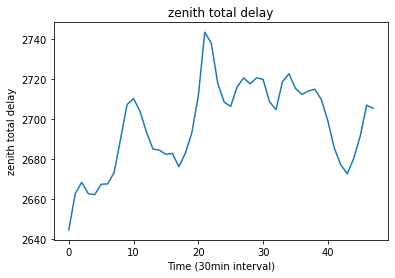

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.fft import fft, fftfreq, ifft

#讀檔
df = pd.read_fwf(r'./test.dat.rtf',skiprows=8)
time=df.iloc[:, 1]
data=df.iloc[:, 7]
#print(df)
data=data.to_numpy()
#print(time)
#print(data)
n=48 #data amount
x = np.arange(0, n, 1)

plt.plot(data)
plt.title("zenith total delay")
plt.ylabel("zenith total delay")
plt.xlabel("Time (30min interval)")
plt.show()